# Implementation of Regression Decision Tree in Python
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. 

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.
### Import desired libraries

In [1]:
import pandas as pd      # for handling and cleaning the dataset
import numpy as np    # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt    # for data visualization
import seaborn as sns    # for data visualization
import sklearn        # for model evaluation and development
import sklearn.metrics as metrics

### Import Dataset

In [2]:
start_up_df = pd.read_csv("50_Startups.csv")
start_up_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Analyse Dataset 

In [3]:
start_up_df.shape # find number rows and columns

(50, 5)

In [4]:
start_up_df.info() # Check information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
start_up_df.isnull().sum()  #ckeck null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.
#### Ckeck multicollinearity

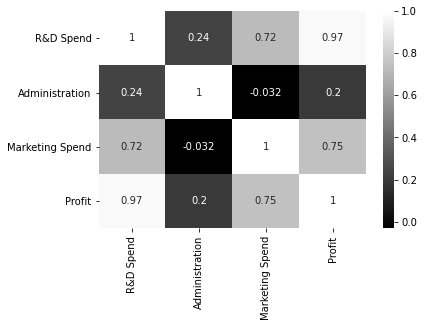

In [6]:
sns.heatmap(start_up_df.corr(),annot=True,cmap='gist_gray')
plt.show()

#### Check linearity

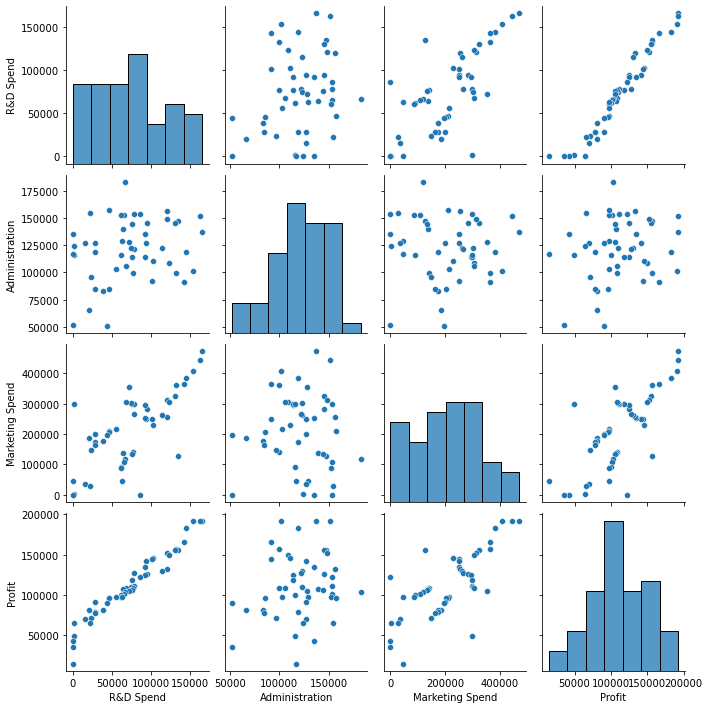

In [7]:
sns.pairplot(start_up_df)

From pairplot, we can conclude following points:
- Research and development spendinng are directly proportional to the profit(target variable).
- Marketing spendinng are directly proportional to the profit(target variable).
- There is no linear relationship between Administration column and profit.
#### Check the existance of outliers

<AxesSubplot:>

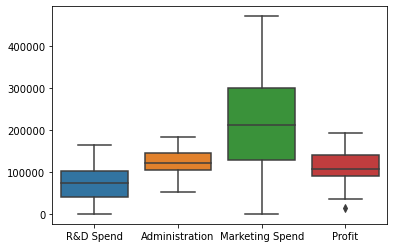

In [8]:
sns.boxplot(data=start_up_df)

From above boxplot, we can conclude that column profit contains outliers. But the size of dataset is small, so it will not create much negative impact on the performance. If dataset is huge, then outliers should be handled by using proper techniques.
### Data Preprocessing

In [9]:
X = start_up_df.iloc[:,:-1].values
Y = start_up_df.iloc[:,-1].values
X = start_up_df.drop('Profit',axis='columns')
Y = start_up_df['Profit']
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X['State'] = labelencoder.fit_transform(X['State'])
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


### Split Dataset into training and test datasets

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

### Build Linear Regression model

In [11]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, Y_train)
Y_train_pred = dt_regressor.predict(X_train)
Y_test_pred = dt_regressor.predict(X_test)

## Visualize a decision tree

In [12]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(dt_regressor, out_file ='tree.dot',
               feature_names =X.columns) 

In [13]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

0

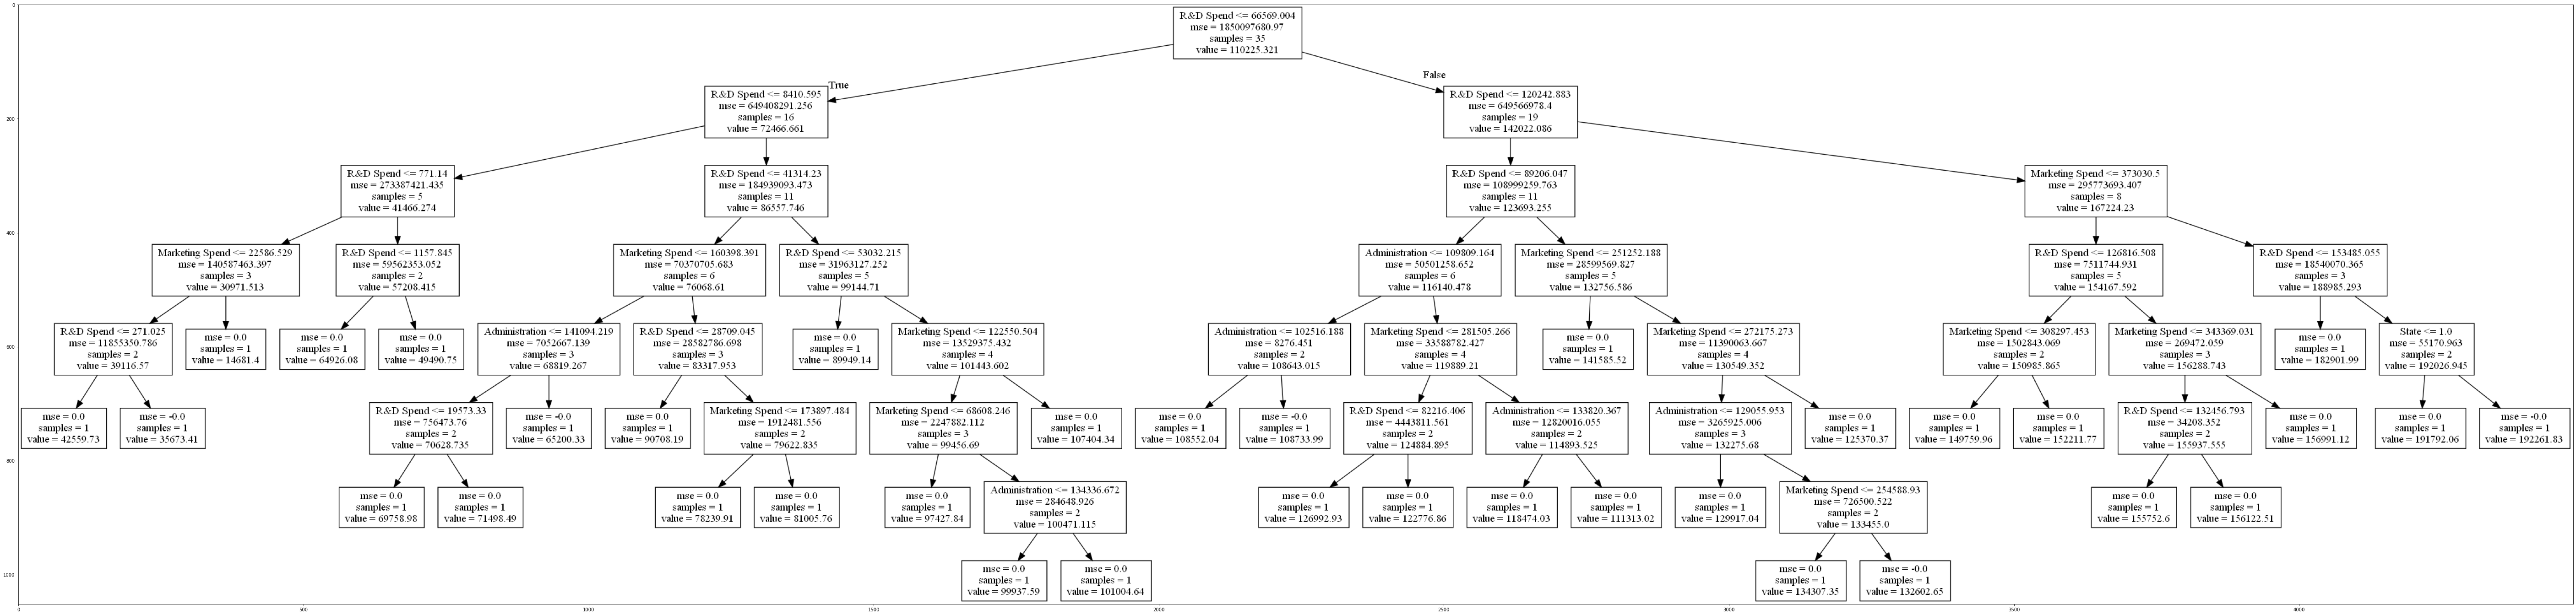

In [14]:
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (100, 50))
plt.imshow(img)

#### Test the model

In [15]:
test_df = pd.DataFrame(columns={'Y_Actual','Y_Predicted'})
test_df['Y_Actual'] = Y_test
test_df['Y_Predicted'] = Y_test_pred
test_df

,Y_Predicted,Y_Actual
28,101004.64,103282.38
11,141585.52,144259.40
10,141585.52,146121.95
41,90708.19,77798.83
2,182901.99,191050.39
27,118474.03,105008.31
38,90708.19,81229.06
31,101004.64,97483.56
22,118474.03,110352.25
4,156991.12,166187.94


In [16]:
test_df = test_df.reset_index()
test_df=test_df.drop('index', axis = 1)
test_df

,Y_Predicted,Y_Actual
0,101004.64,103282.38
1,141585.52,144259.40
2,141585.52,146121.95
3,90708.19,77798.83
4,182901.99,191050.39
5,118474.03,105008.31
6,90708.19,81229.06
7,101004.64,97483.56
8,118474.03,110352.25
9,156991.12,166187.94


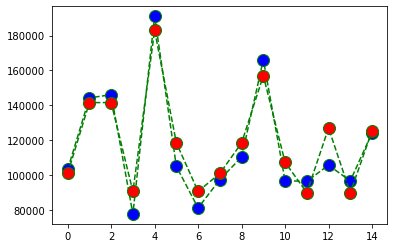

In [17]:
plt.plot( test_df['Y_Actual'], color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
plt.plot(test_df.index, test_df['Y_Predicted'], color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)

### Test score for training as well as test data

In [18]:
print("Performance score of model for training data ",dt_regressor.score(X_train,Y_train))
print("Performance score of model for test data ",dt_regressor.score(X_test,Y_test))

Performance score of model for training data  1.0
Performance score of model for test data  0.9064447704764


### Model Evaluation

In [19]:
print("Results of sklearn.metrics:")
print("MAE:",metrics.mean_absolute_error(Y_test, Y_test_pred))
print("MSE:", metrics.mean_squared_error(Y_test, Y_test_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print("R-Squared:", metrics.r2_score(Y_test, Y_test_pred))

Results of sklearn.metrics:
MAE: 8040.843333333338
MSE: 90303930.06139341
RMSE: 9502.838000376172
R-Squared: 0.9064447704764
